<a href="https://colab.research.google.com/github/uirom/practice/blob/main/part_5_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84_%ED%99%9C%EC%9A%A9_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
#랜덤 시드 고정: 랜덤함수는 난수를 발생시킴. 시드값을 고정하지 않으면 계속해서 다른 값을 내뱉음
SEED= 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("시드 고정:", SEED)

시드 고정: 12


In [ ]:
#sklearn 데이터셋에서 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target
print(X_data.shape, y_data.shape)
#결과값으로 입력 13개, 출력 506개 확인

(506, 13) (506,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#피처 스케일링: MinMaxScaler를 사용하여 입력 데이터 피처값의 범위를 비슷하게 맞춰줌
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

X_data_scaled[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [ ]:
#학습 - 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size= 0.2,    #(검증데이터 20%)
                                                    shuffle= True,
                                                    random_state= SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
#은닉 레이어의 활성화 힘수로는 ReLU함수를 사용.
#ReLU함수는 입력이 0보다 크면 그대로 출력, 0이하는 0을 출력
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_dim=num_input))
  model.add(Dense(64, activation= 'relu'))
  model.add(Dense(32, activation= 'relu'))
  model.add(Dense(16, activation= 'relu'))
  model.add(Dense(1, activation= 'linear'))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  return model

model = build_model(num_input= 13)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
13/13 - 1s - loss: 87.6453 - mae: 6.9585 - 798ms/epoch - 61ms/step
Epoch 2/100
13/13 - 0s - loss: 66.3272 - mae: 5.8104 - 40ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 65.1841 - mae: 5.7634 - 32ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 59.6213 - mae: 5.6163 - 27ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 55.4058 - mae: 5.3637 - 27ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 65.1745 - mae: 5.7097 - 33ms/epoch - 3ms/step
Epoch 7/100
13/13 - 0s - loss: 55.0850 - mae: 5.6530 - 28ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 55.0642 - mae: 5.2550 - 29ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 51.0933 - mae: 5.1127 - 29ms/epoch - 2ms/step
Epoch 10/100
13/13 - 0s - loss: 45.4516 - mae: 4.7980 - 27ms/epoch - 2ms/step
Epoch 11/100
13/13 - 0s - loss: 48.3348 - mae: 5.0286 - 28ms/epoch - 2ms/step
Epoch 12/100
13/13 - 0s - loss: 45.4269 - mae: 4.7722 - 28ms/epoch - 2ms/step
Epoch 13/100
13/13 - 0s - loss: 58.0283 - mae: 5.6321 - 26ms/epoch - 2m

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 20.9115 - mae: 3.1900


[20.911497116088867, 3.190047264099121]

In [ ]:
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.25, verbose=2)

Epoch 1/200
10/10 - 1s - loss: 1237.2273 - mae: 25.6319 - val_loss: 181.4406 - val_mae: 11.0436 - 810ms/epoch - 81ms/step
Epoch 2/200
10/10 - 0s - loss: 172.0374 - mae: 10.3364 - val_loss: 102.9056 - val_mae: 7.0507 - 68ms/epoch - 7ms/step
Epoch 3/200
10/10 - 0s - loss: 88.3426 - mae: 6.7461 - val_loss: 60.3246 - val_mae: 6.2380 - 51ms/epoch - 5ms/step
Epoch 4/200
10/10 - 0s - loss: 76.0710 - mae: 6.6196 - val_loss: 59.9225 - val_mae: 5.6343 - 50ms/epoch - 5ms/step
Epoch 5/200
10/10 - 0s - loss: 73.5757 - mae: 6.1326 - val_loss: 59.5305 - val_mae: 5.9455 - 48ms/epoch - 5ms/step
Epoch 6/200
10/10 - 0s - loss: 72.6879 - mae: 6.0497 - val_loss: 58.8538 - val_mae: 5.3517 - 47ms/epoch - 5ms/step
Epoch 7/200
10/10 - 0s - loss: 70.4425 - mae: 5.7623 - val_loss: 55.3603 - val_mae: 5.8217 - 68ms/epoch - 7ms/step
Epoch 8/200
10/10 - 0s - loss: 71.0295 - mae: 6.3172 - val_loss: 54.2397 - val_mae: 5.2034 - 46ms/epoch - 5ms/step
Epoch 9/200
10/10 - 0s - loss: 70.3441 - mae: 5.6543 - val_loss: 53.16

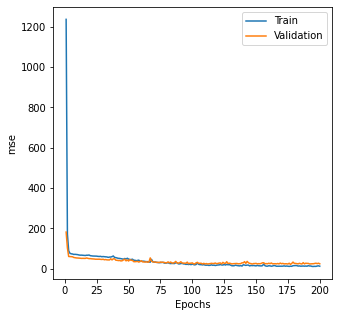

In [ ]:
import matplotlib.pyplot as plt      #훈련손실(loss)와 검증손실(val_loss)의 그래프
def plot_loss_curve(total_epoch=10, start=1):
  plt.figure(figsize=(5,5))
  plt.plot(range(start, total_epoch + 1),
           history.history['loss'][start-1:total_epoch],
           label='Train')
  plt.plot(range(start, total_epoch + 1),
           history.history['val_loss'][start-1:total_epoch],
           label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('mse')
  plt.legend()
  plt.show()

plot_loss_curve(total_epoch=200, start=1)

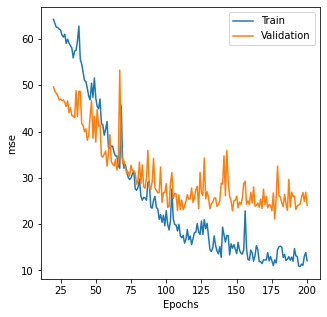

In [ ]:
plot_loss_curve(total_epoch=200, start=20)   #40에포크 이후 과대적합이 커지는 것 확인가능